AI for Medical Sciences and Psychology by Tshepo Chris Nokeri, Apress. 2022

# Chapter 7 Modelling Clinical Trial Data

This chapter familiarizes you with the prime essentials of the most widespread method for adequately investigating data from a clinical trial, recognized as a survival method. It debunks the Nelson-Aalen additive model. To begin with, it encapsulates the method. Subsequently, it presents exploratory analysis, then correlation analysis by executing the Pearson correlation method. Following that, it outlines the survival table, then fits the model. It concludes by outlining the profile table, confidence interval, and reproducing the cumulative and baseline hazard. 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks", font_scale = 1, font = "Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300

# Descriptive Statistics

In [2]:
survival_censored_data = pd.read_csv(r"C:\Users\i5 lenov\Desktop\Next_Chapter\source_code\haberman_survival_data\haberman_survival_data.csv")
survival_censored_data.columns = ["Age", "Year_of_operation", "Axillary_lymph_nodes ", "Event"]

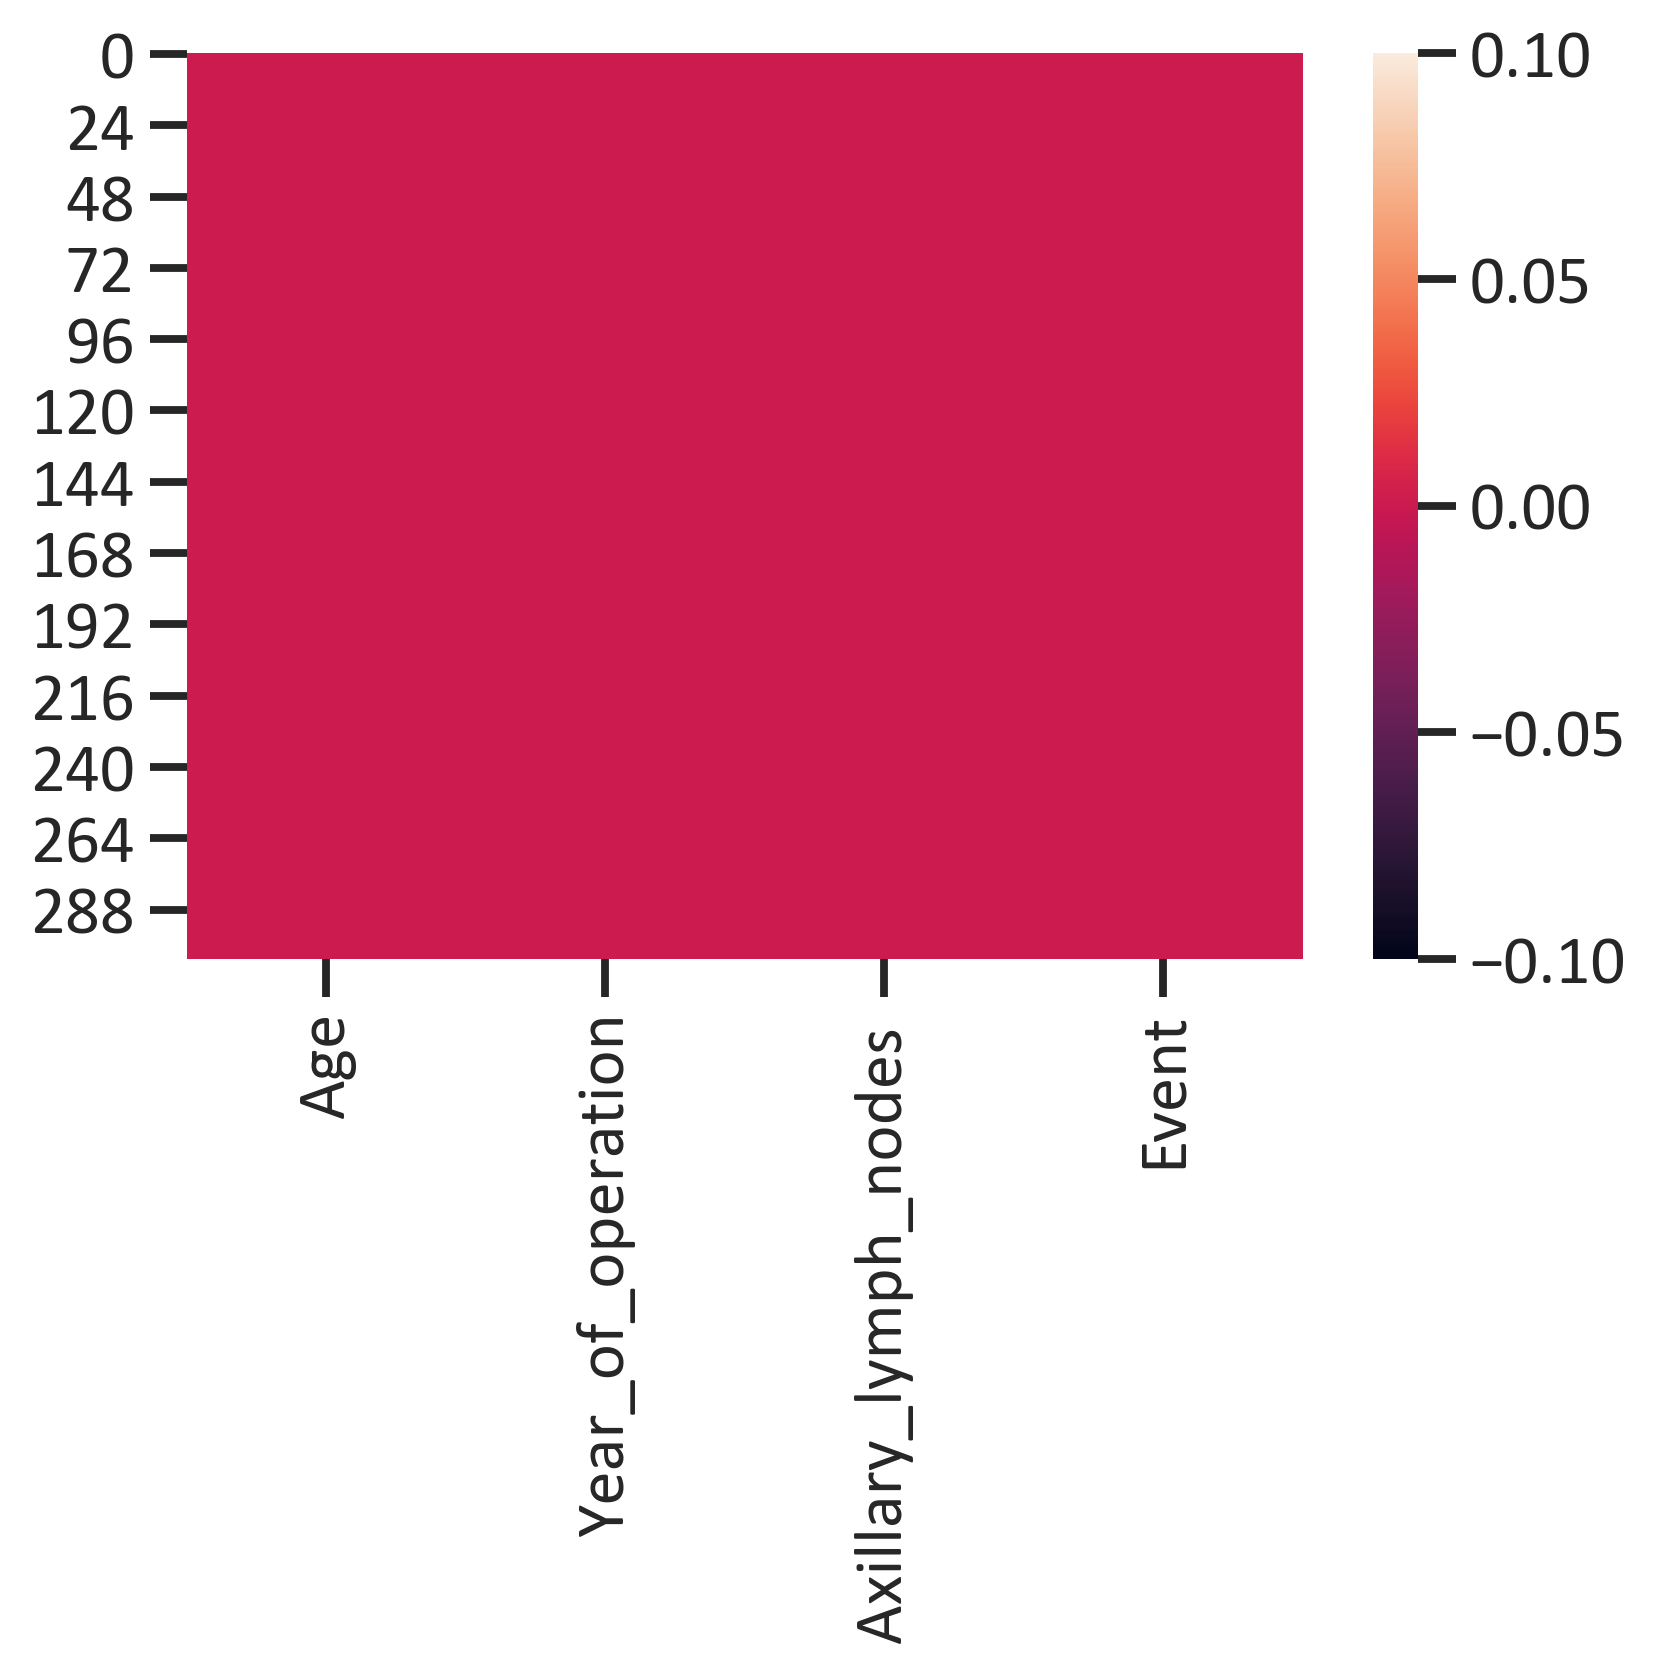

In [3]:
sns.heatmap(survival_censored_data.isnull())
plt.show()

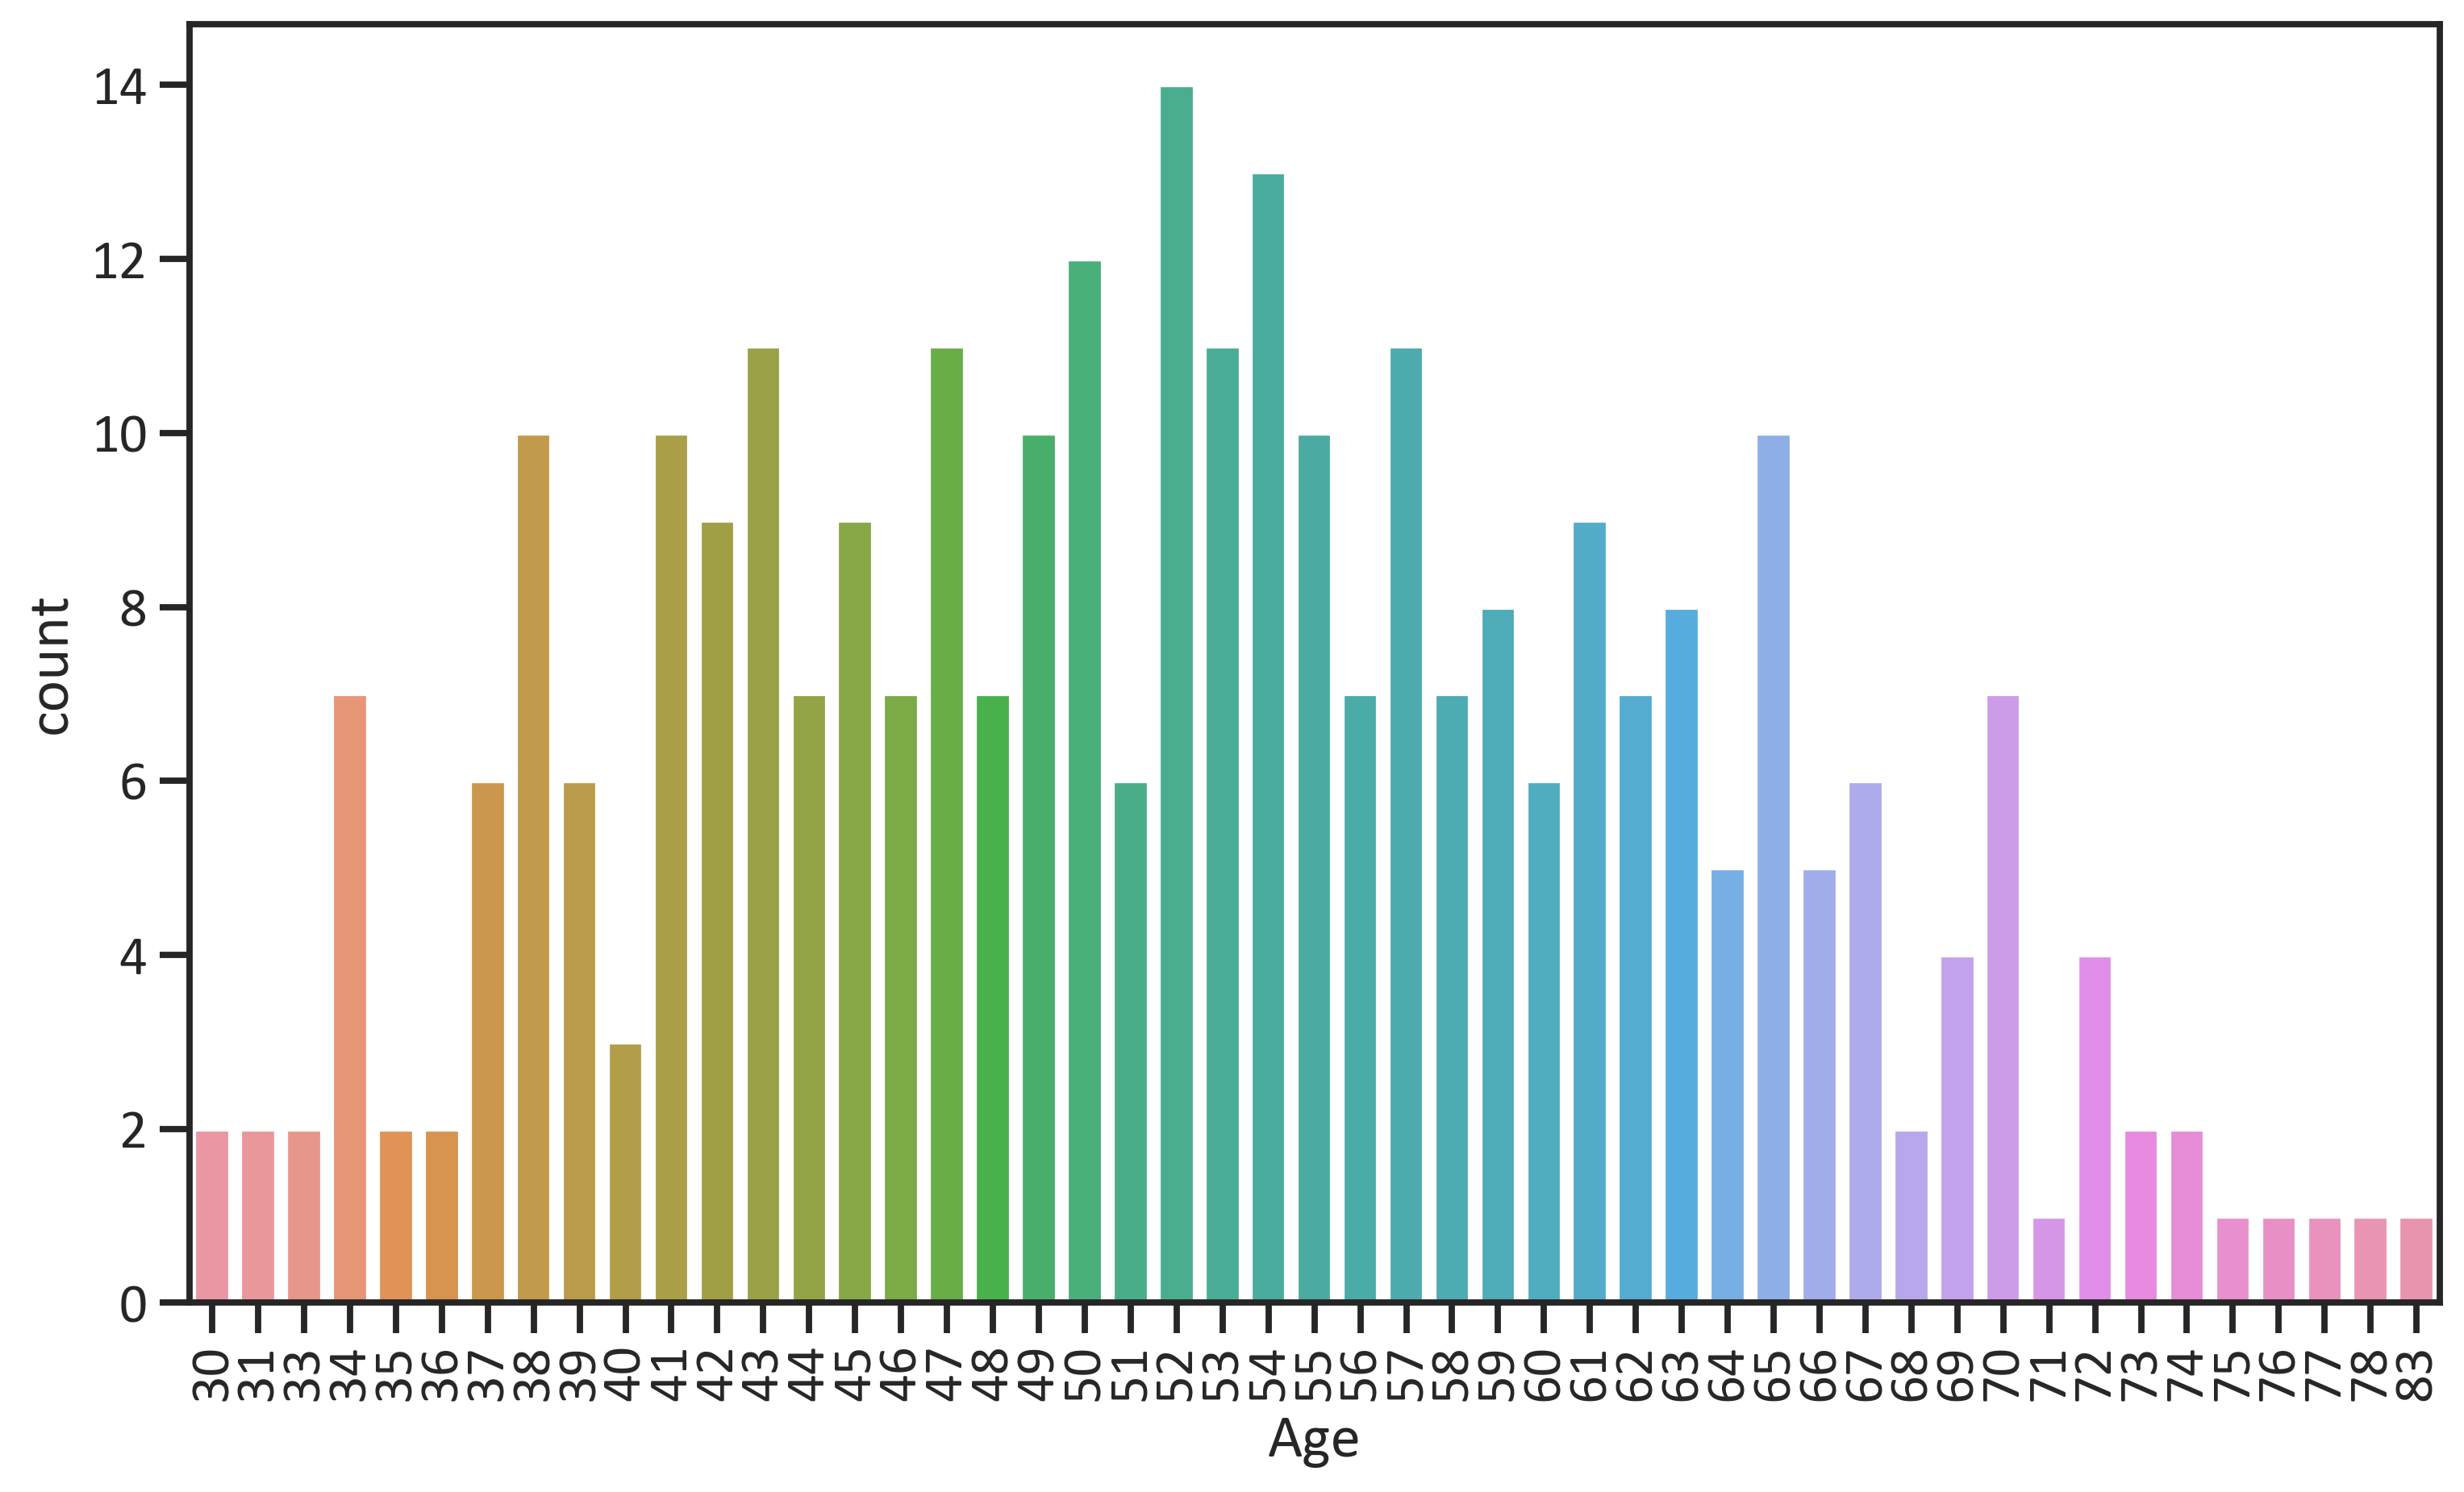

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(survival_censored_data["Age"], ax = ax)
plt.xticks (rotation = 90)
plt.show()

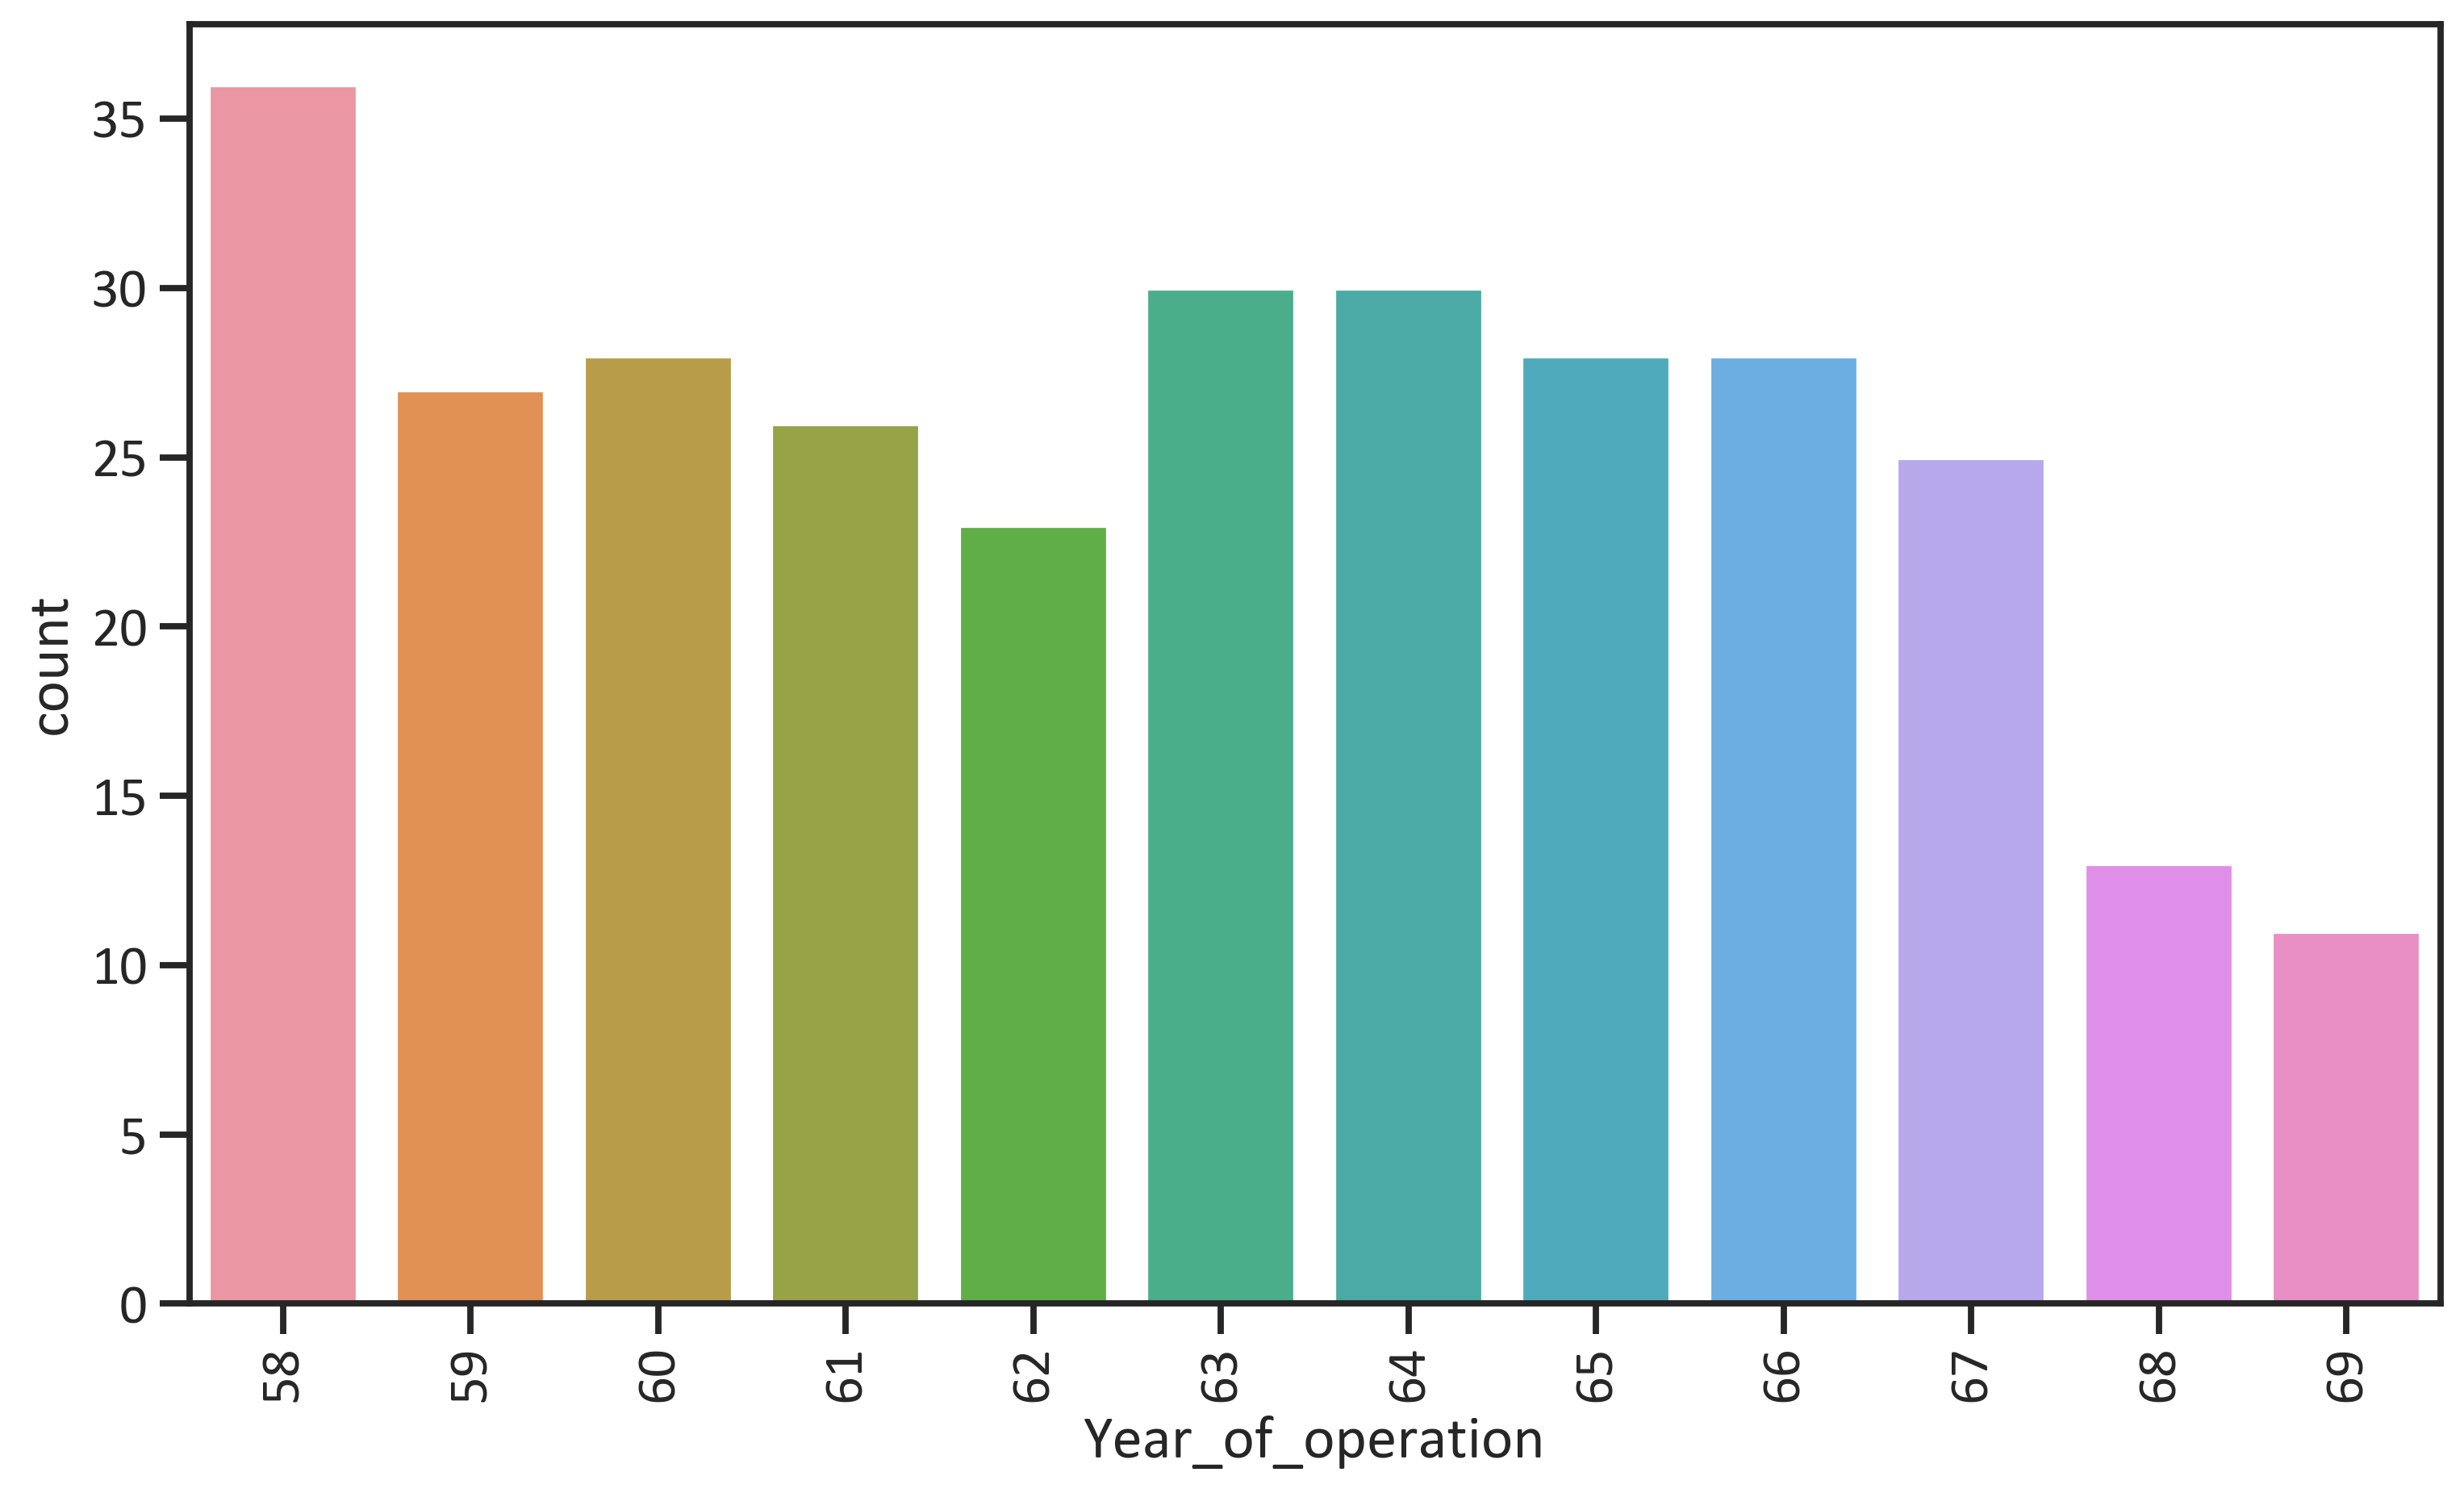

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(survival_censored_data["Year_of_operation"], ax = ax)
plt.xticks (rotation = 90)
plt.show()

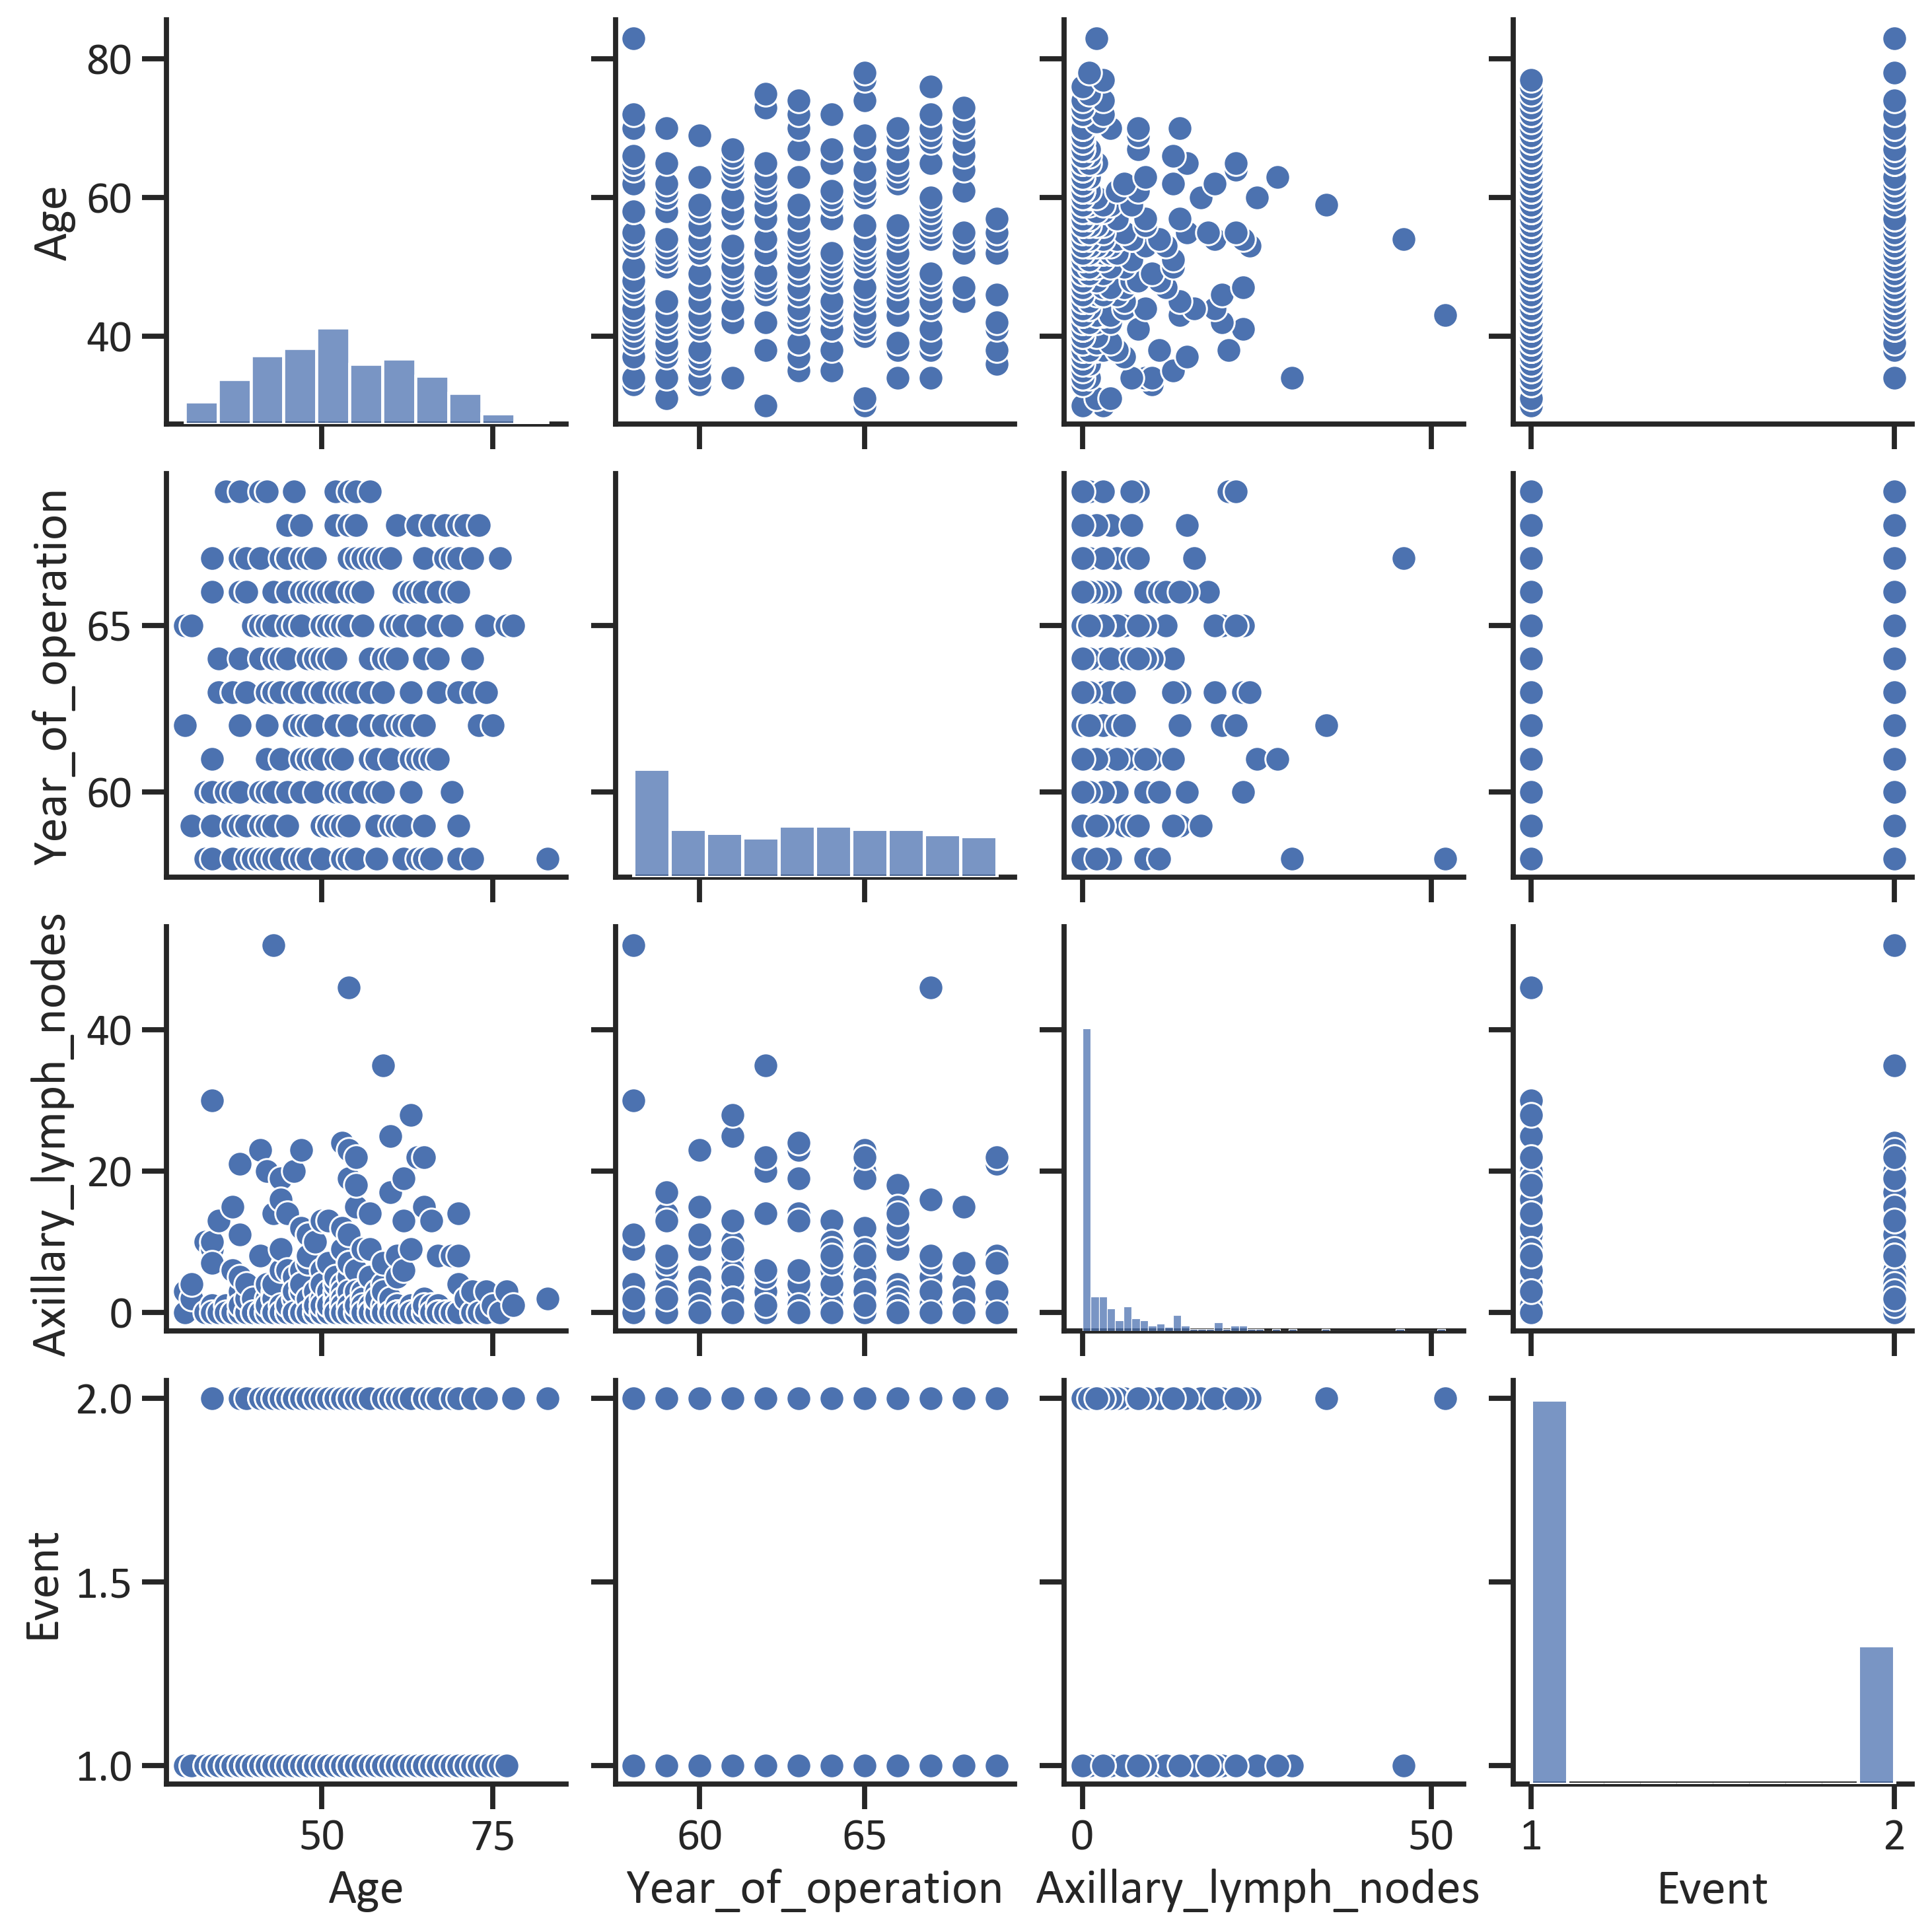

In [6]:
sns.pairplot(survival_censored_data)
plt.show()

In [7]:
survival_censored_data_descriptive_stats = survival_censored_data.describe().transpose()
survival_censored_data_descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Age,305.0,52.531148,10.744024,30.0,44.0,52.0,61.0,83.0
Year_of_operation,305.0,62.849180,3.254078,58.0,60.0,63.0,66.0,69.0
Axillary_lymph_nodes,305.0,4.036066,7.199370,0.0,0.0,1.0,4.0,52.0
Event,305.0,1.265574,0.442364,1.0,1.0,1.0,2.0,2.0


# Realizing the Correlation Relationship

In [8]:
age_yr_op_correlation = survival_censored_data[["Age", "Year_of_operation"]].corr(method = "pearson")
age_yr_op_correlation

,Age,Year_of_operation
Age,1.000000,0.092623
Year_of_operation,0.092623,1.000000


In [9]:
yr_op_event_correlation = survival_censored_data[["Year_of_operation", "Event"]].corr(method = "pearson")
yr_op_event_correlation

,Year_of_operation,Event
Year_of_operation,1.000000,-0.004076
Event,-0.004076,1.000000


# Outlining the Survival Table

In [10]:
from lifelines.utils import survival_table_from_events
Time = survival_censored_data["Year_of_operation"]
Event = survival_censored_data["Event"]
survival_table = survival_table_from_events(Time, Event)
survival_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,305,305
58.0,36,36,0,0,305
59.0,27,27,0,0,269
60.0,28,28,0,0,242
61.0,26,26,0,0,214
62.0,23,23,0,0,188
63.0,30,30,0,0,165
64.0,30,30,0,0,135
65.0,28,28,0,0,105


# Executing an Aalen Additive Model

In [11]:
from lifelines import AalenAdditiveFitter
aalen_additive_method = AalenAdditiveFitter().fit(survival_censored_data, "Year_of_operation", event_col = "Event")
aalen_additive_method_summary = aalen_additive_method.print_summary()
aalen_additive_method_summary

In [12]:
aalen_additive_method_ci = aalen_additive_method.confidence_intervals_
aalen_additive_method_ci

Age  Axillary_lymph_nodes   _intercept
95% lower-bound 58.0 -0.011789              -0.018840   -0.145918
                59.0 -0.018651              -0.021651   -0.004624
                60.0 -0.029200              -0.027498    0.323593
                61.0 -0.031100              -0.032479    0.333276
                62.0 -0.034727              -0.037655    0.354644
                63.0 -0.043889              -0.043974    0.591264
                64.0 -0.052604              -0.054649    0.888015
                65.0 -0.064916              -0.062502    0.977393
                66.0 -0.080685              -0.076952    1.235606
                67.0 -0.108367              -0.111897    1.322455
                68.0 -0.123392              -0.152858   -0.226685
                69.0 -0.287892              -0.262761   -1.590887
95% upper-bound 58.0  0.014053               0.019916    0.258724
                59.0  0.016134               0.022809    0.568260
                60.0  0.015403               0.023818    1.085101
                61.0  0.019462               0.030469    1.196271
                62.0  0.023861               0.041435    1.354825
                63.0  0.026653               0.053084    1.799925
                64.0  0.029656               0.049602    2.307316
                65.0  0.040445               0.066189    2.797615
                66.0  0.051745               0.073717    3.535390
                67.0  0.077604               0.108511    4.569100
                68.0  0.147481               0.129512    4.276818
                69.0  0.311981               0.239415    7.641019

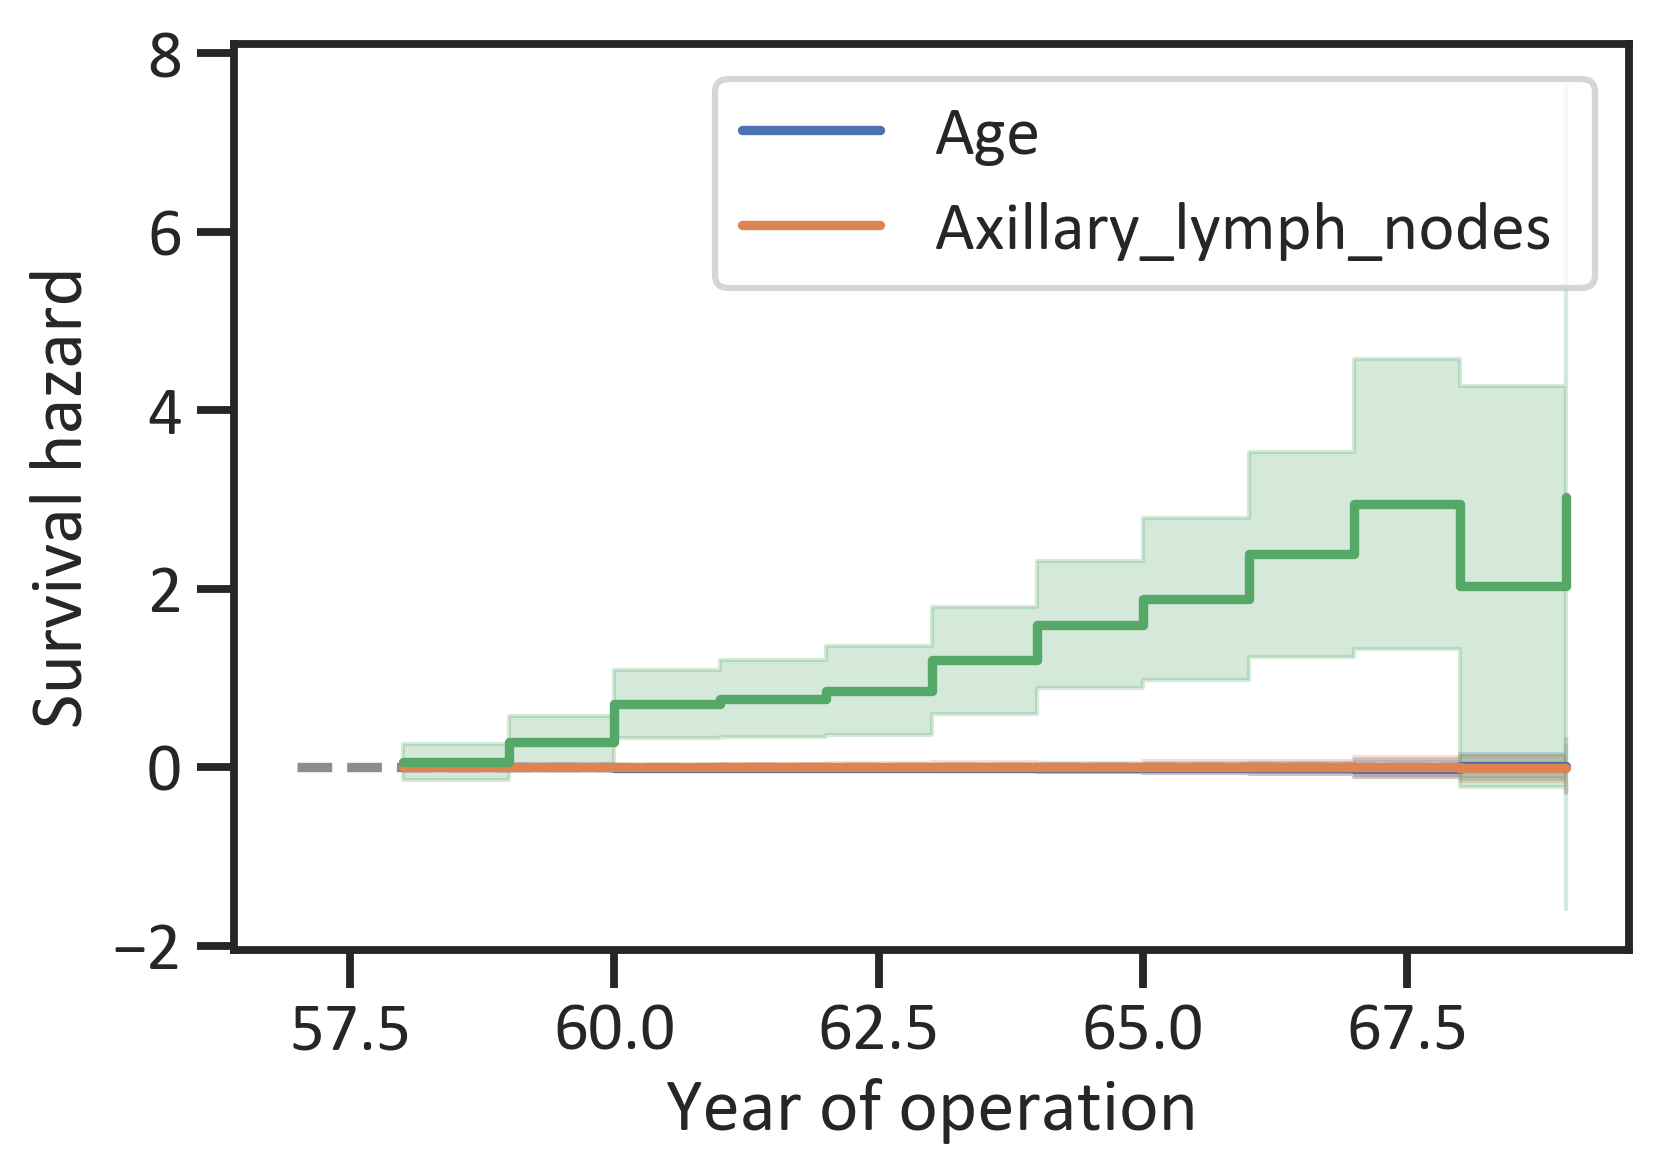

In [13]:
aalen_additive_method.plot()
plt.ylabel("Survival hazard")
plt.xlabel("Year of operation")
plt.show()

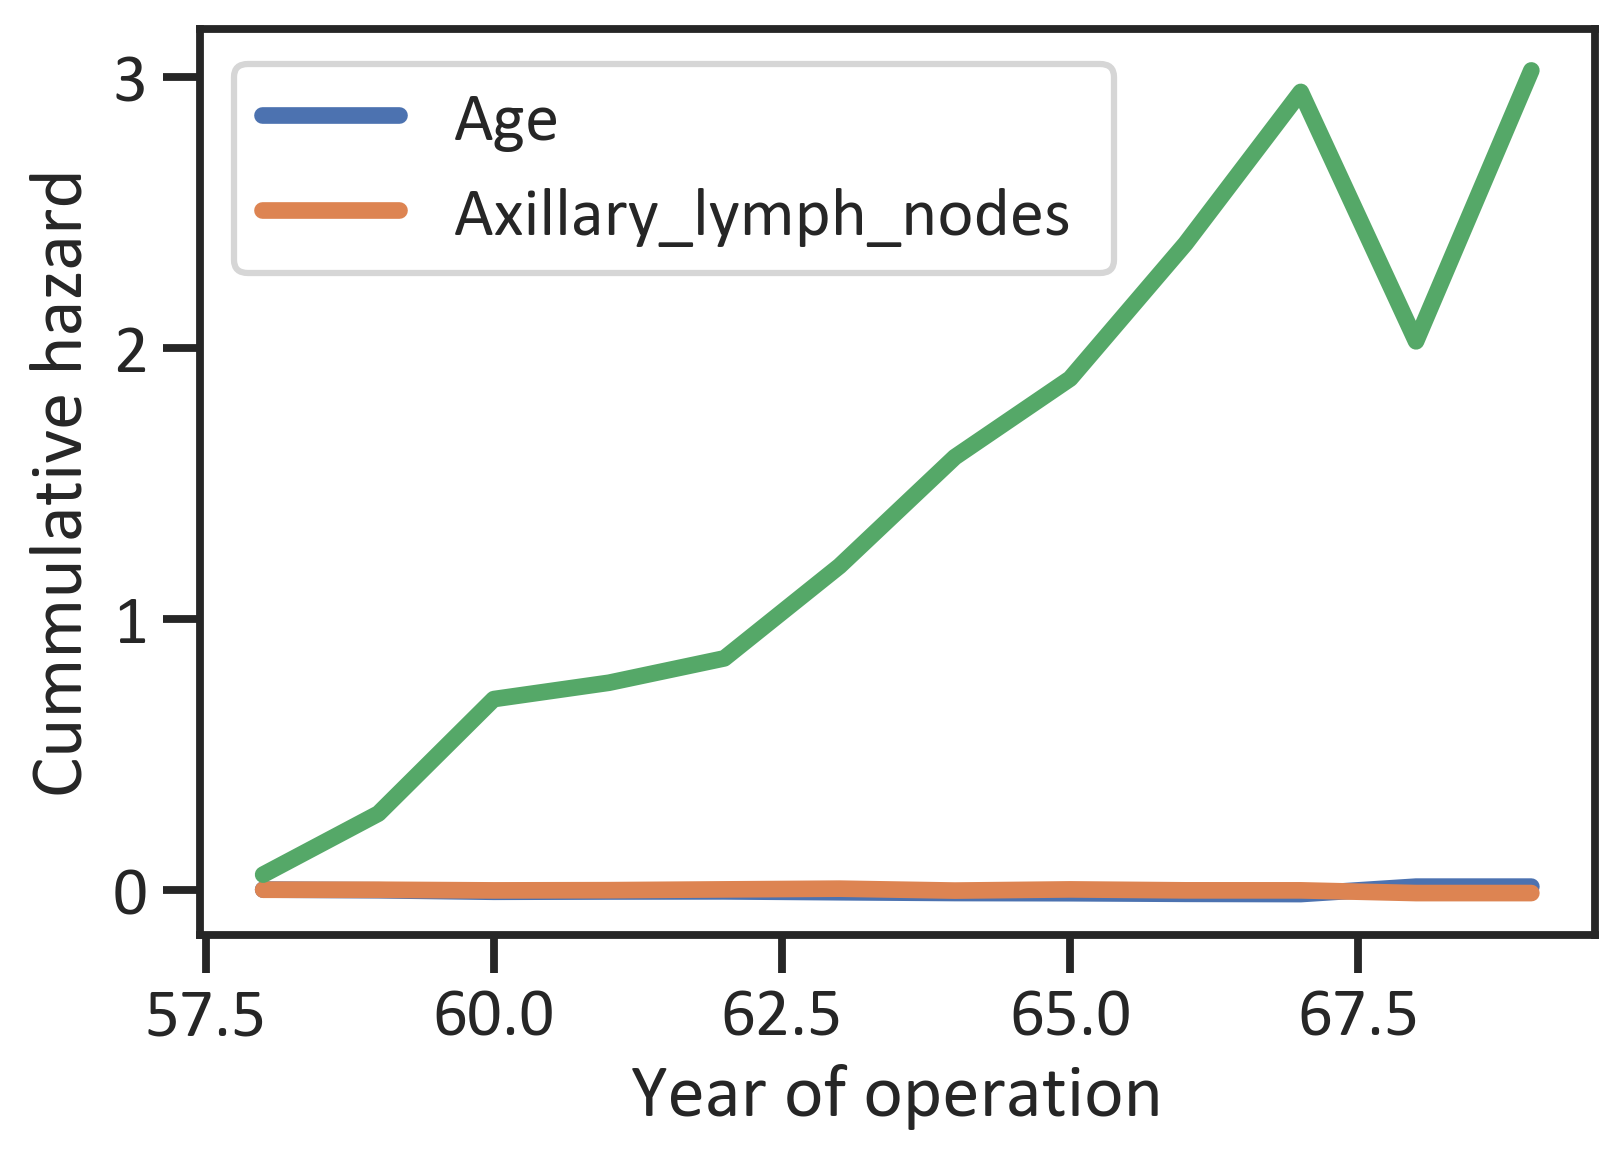

In [14]:
aalen_additive_method.cumulative_hazards_.plot(lw = 4)
plt.ylabel("Cummulative hazard")
plt.xlabel("Year of operation")
plt.show()

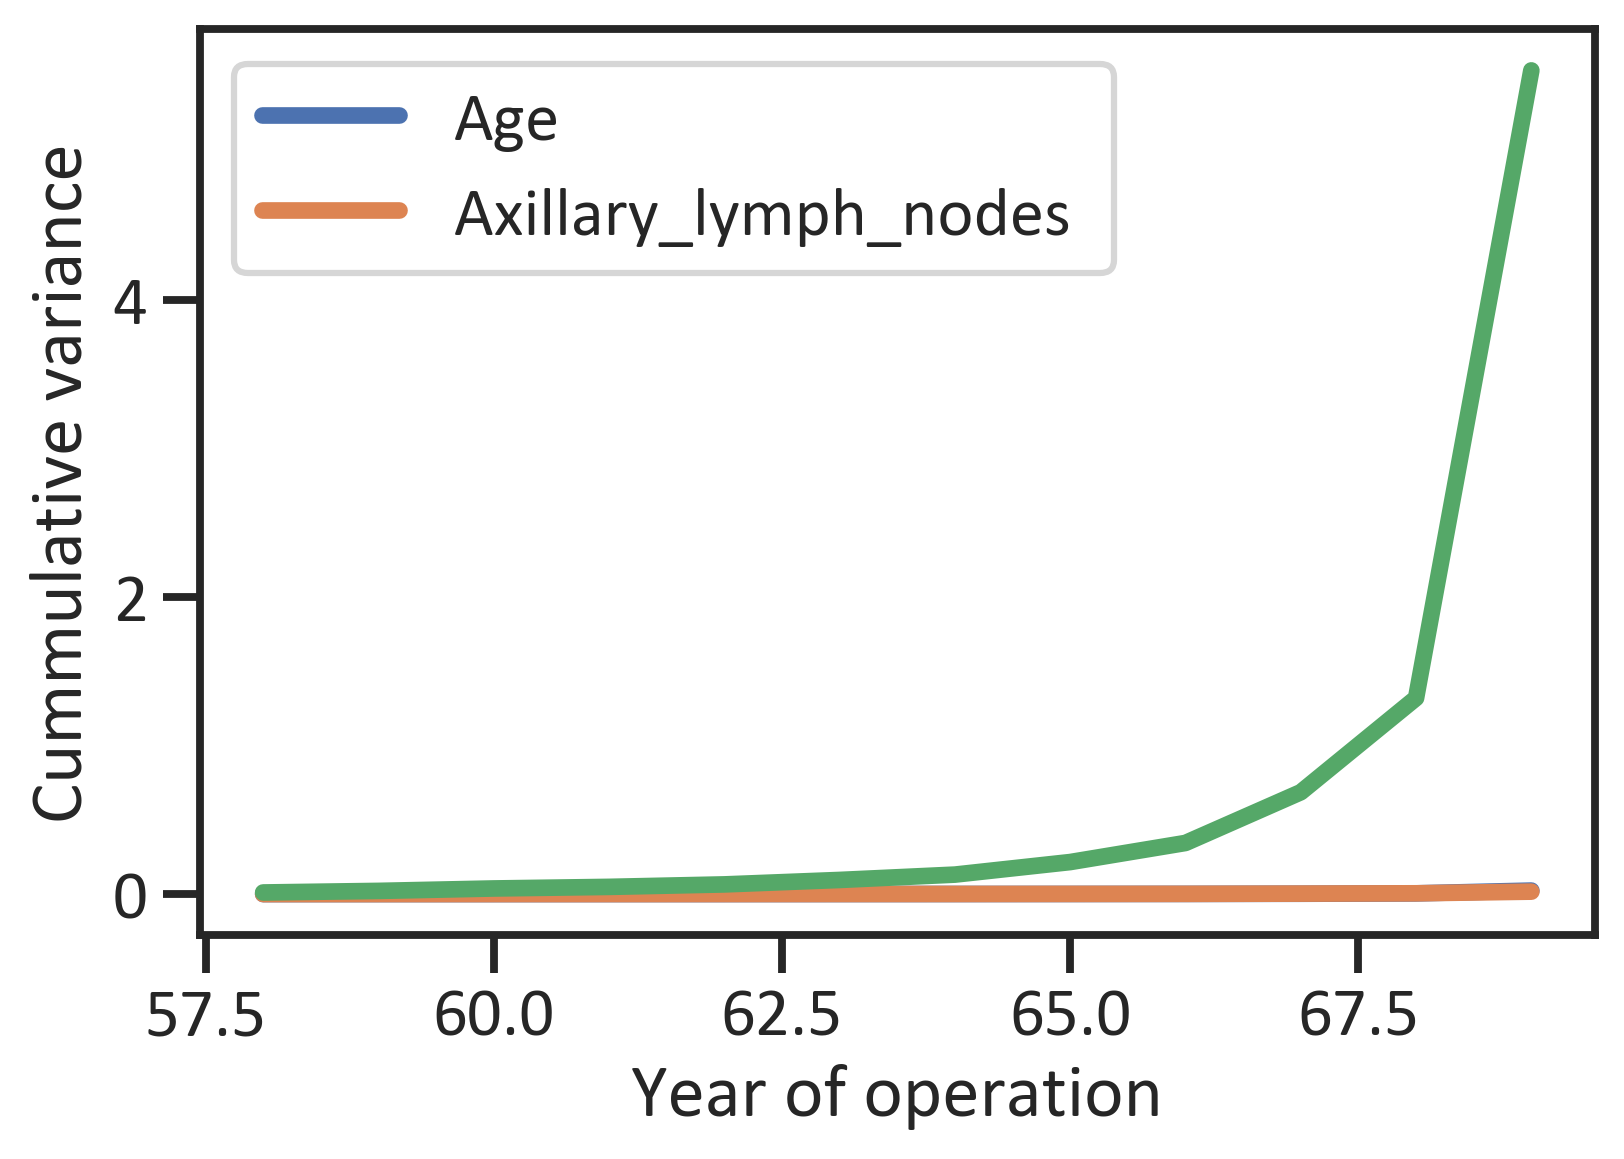

In [15]:
aalen_additive_method.cumulative_variance_.plot(lw=4)
plt.ylabel("Cummulative variance")
plt.xlabel("Year of operation")
plt.show()